In [1]:
from utils import *
import pandas as pd
import numpy as np
from trader import KalmanFilter

In [2]:
cnt_train = load_product('train', 'COCONUTS')
pnc_train = load_product('train', 'PINA_COLADAS')
cnt_val = load_product('val', 'COCONUTS')
pnc_val = load_product('val', 'PINA_COLADAS')

In [3]:
val = pd.concat((cnt_val['mid_price'], pnc_val['mid_price']), axis=1)
val.columns = ['cnt', 'pnc']
val.head()

,cnt,pnc
timestamp,,
0,8004.5,15014.5
100,8004.0,15012.5
200,8004.0,15016.5
300,8005.0,15015.5
400,8003.5,15013.5


In [4]:
X = np.hstack((cnt_train['mid_price'].to_numpy().reshape(-1, 1), np.ones((cnt_train['mid_price'].shape[0], 1))))
Y = pnc_train['mid_price'].to_numpy().reshape(-1, 1)
params = np.linalg.inv(X.T @ X) @ X.T @ Y

In [5]:
Q = np.asarray([[4.59125883e-08, 0],
                [0, 7.08748404e-16]])

In [6]:
km = KalmanFilter(params, Q, 2.97450649)

In [15]:
gamma = []
mu = []
Q = []

for i, row in enumerate(val.to_numpy()):
    if i % 30 == 0:
        out = km(row[1], row[0])
    gamma.append(out[0])
    mu.append(out[1])
    Q.append(out[2])

val['gamma'] = gamma
val['mu'] = mu
val['Q'] = Q
val.head()

,cnt,pnc,gamma,mu,Q,spread
timestamp,,,,,,
0,8004.5,15014.5,1.930397,-439.161182,5.916219,12.758316
100,8004.0,15012.5,1.930397,-439.161182,5.916219,11.722830
200,8004.0,15016.5,1.930397,-439.161182,5.916219,15.722830
300,8005.0,15015.5,1.930397,-439.161182,5.916219,12.793802
400,8003.5,15013.5,1.930397,-439.161182,5.916219,13.687344


In [16]:
val['spread'] = val['pnc'] - val['gamma'] * val['cnt'] - val['mu']

In [17]:
val['Q'] = np.sqrt(val['Q'])

<Axes: xlabel='timestamp'>

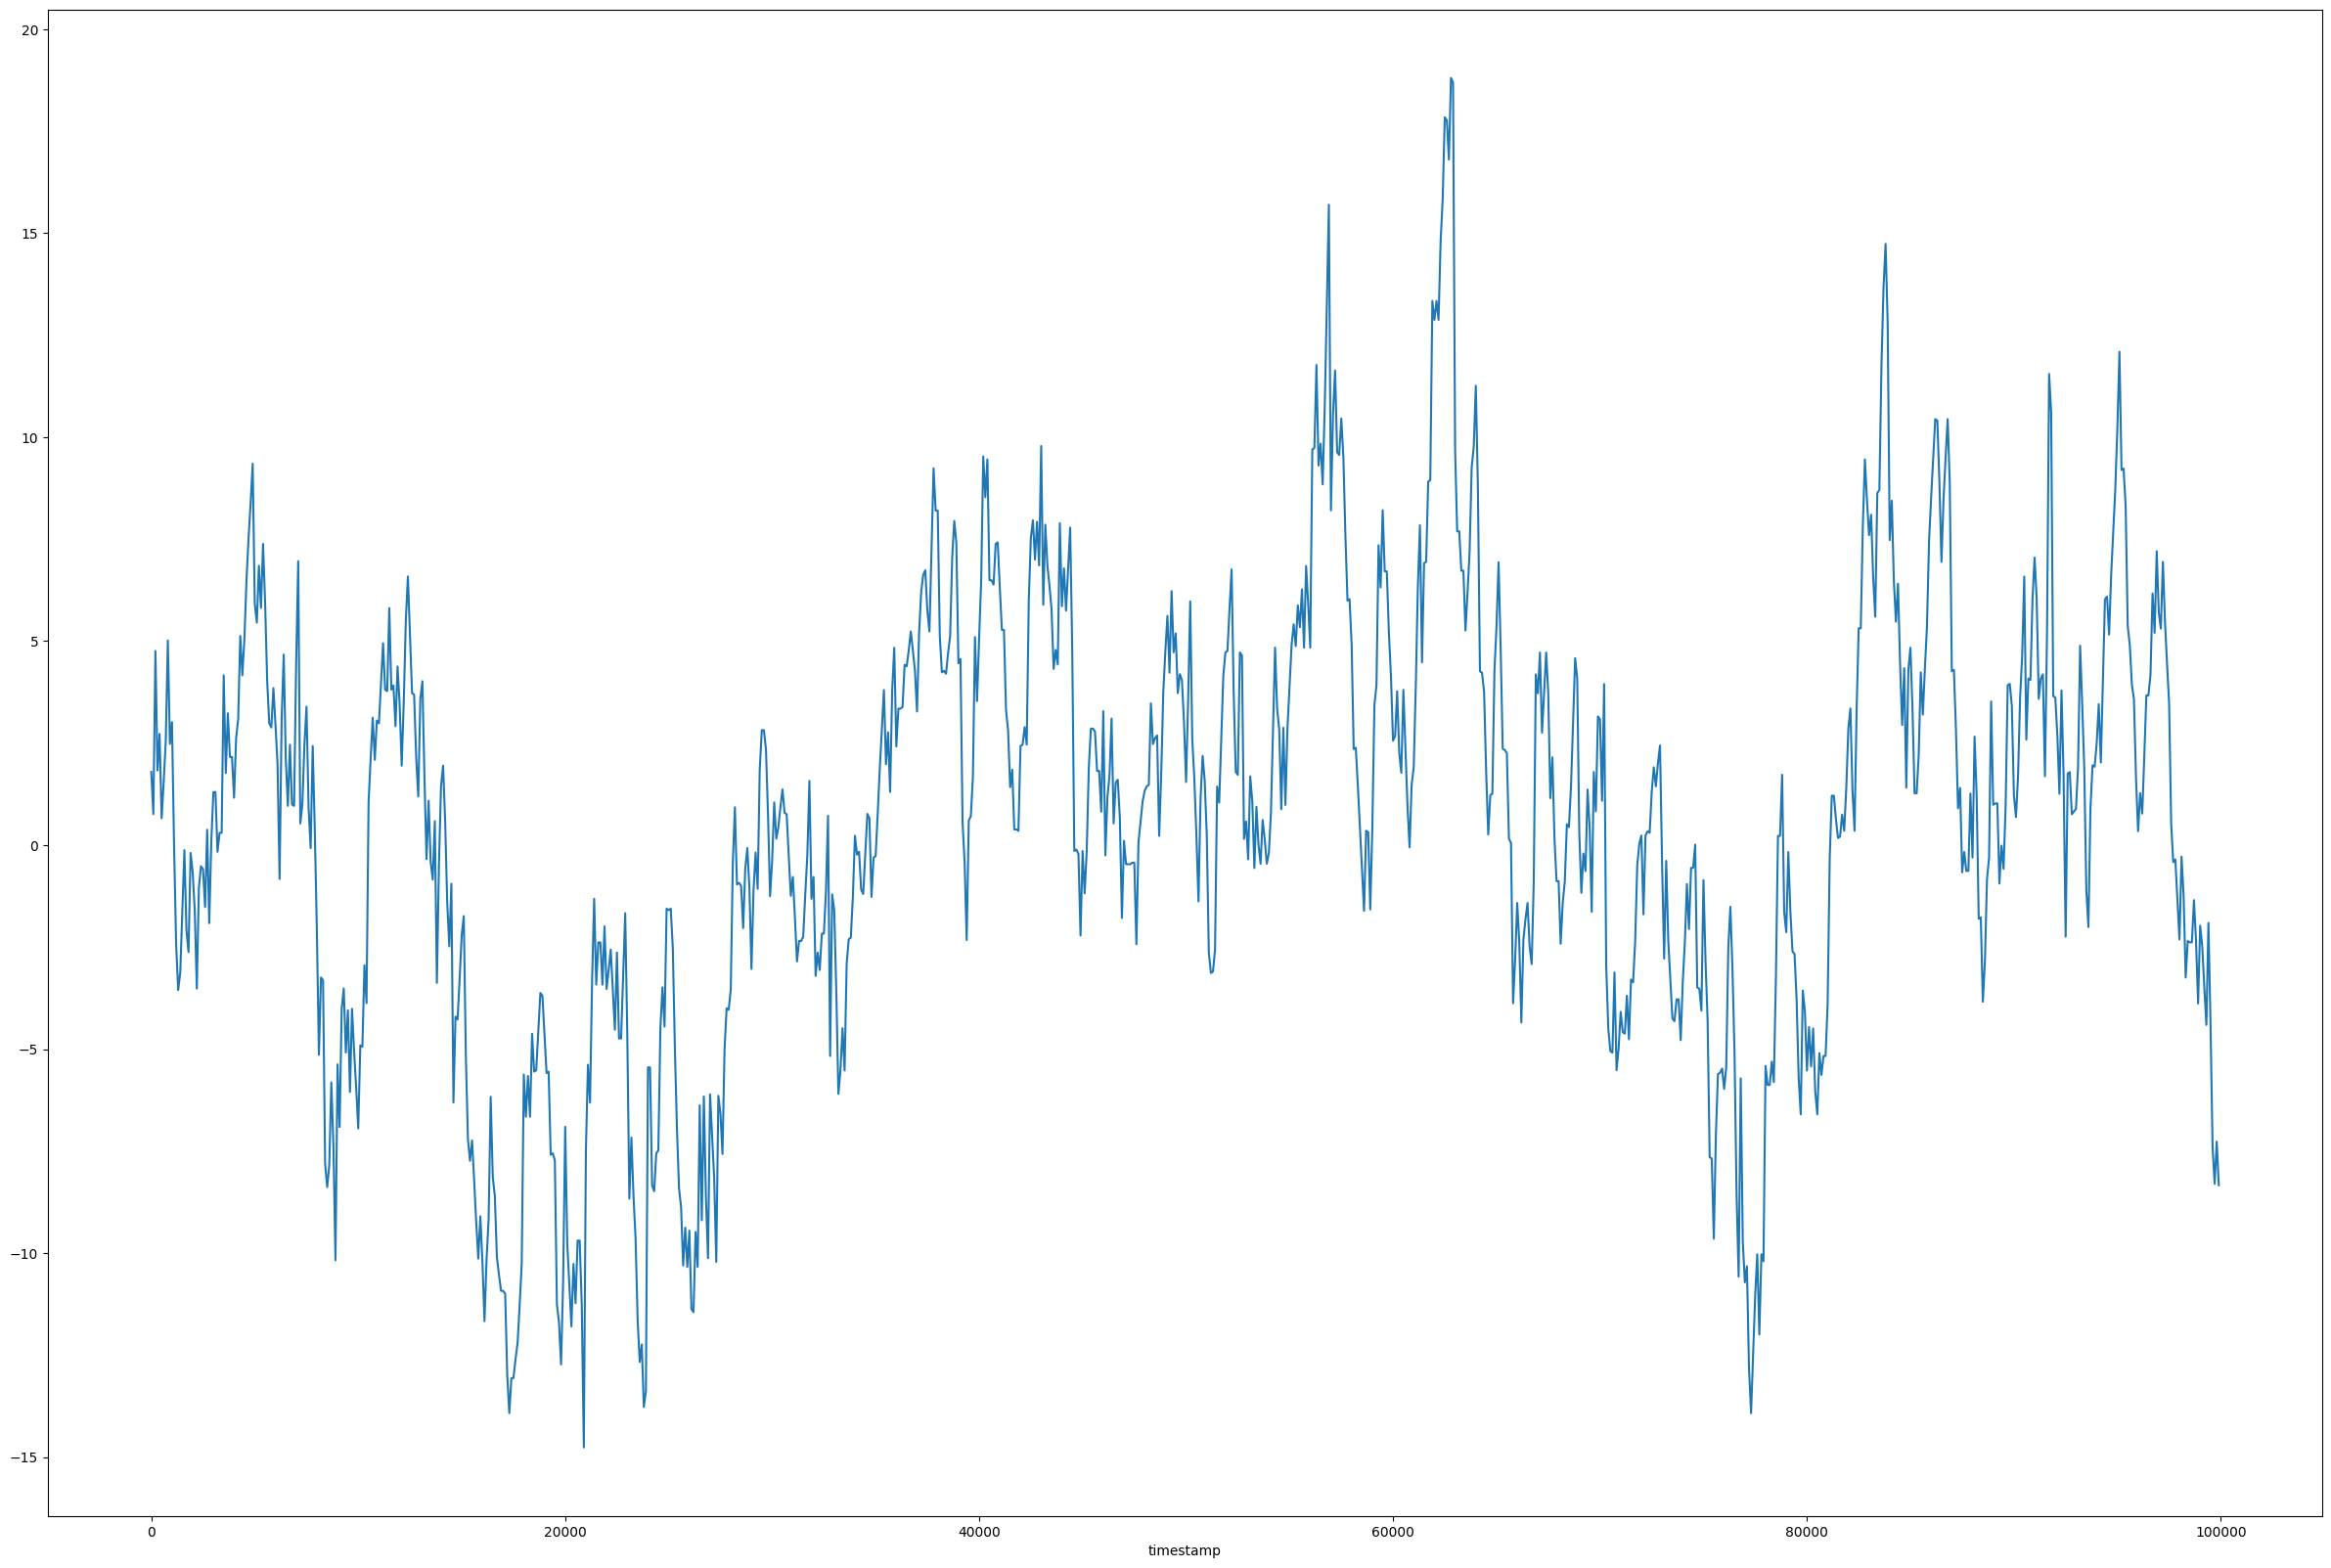

In [18]:
val['spread'][0:1000].plot(figsize=(30, 20))

<Axes: xlabel='timestamp'>

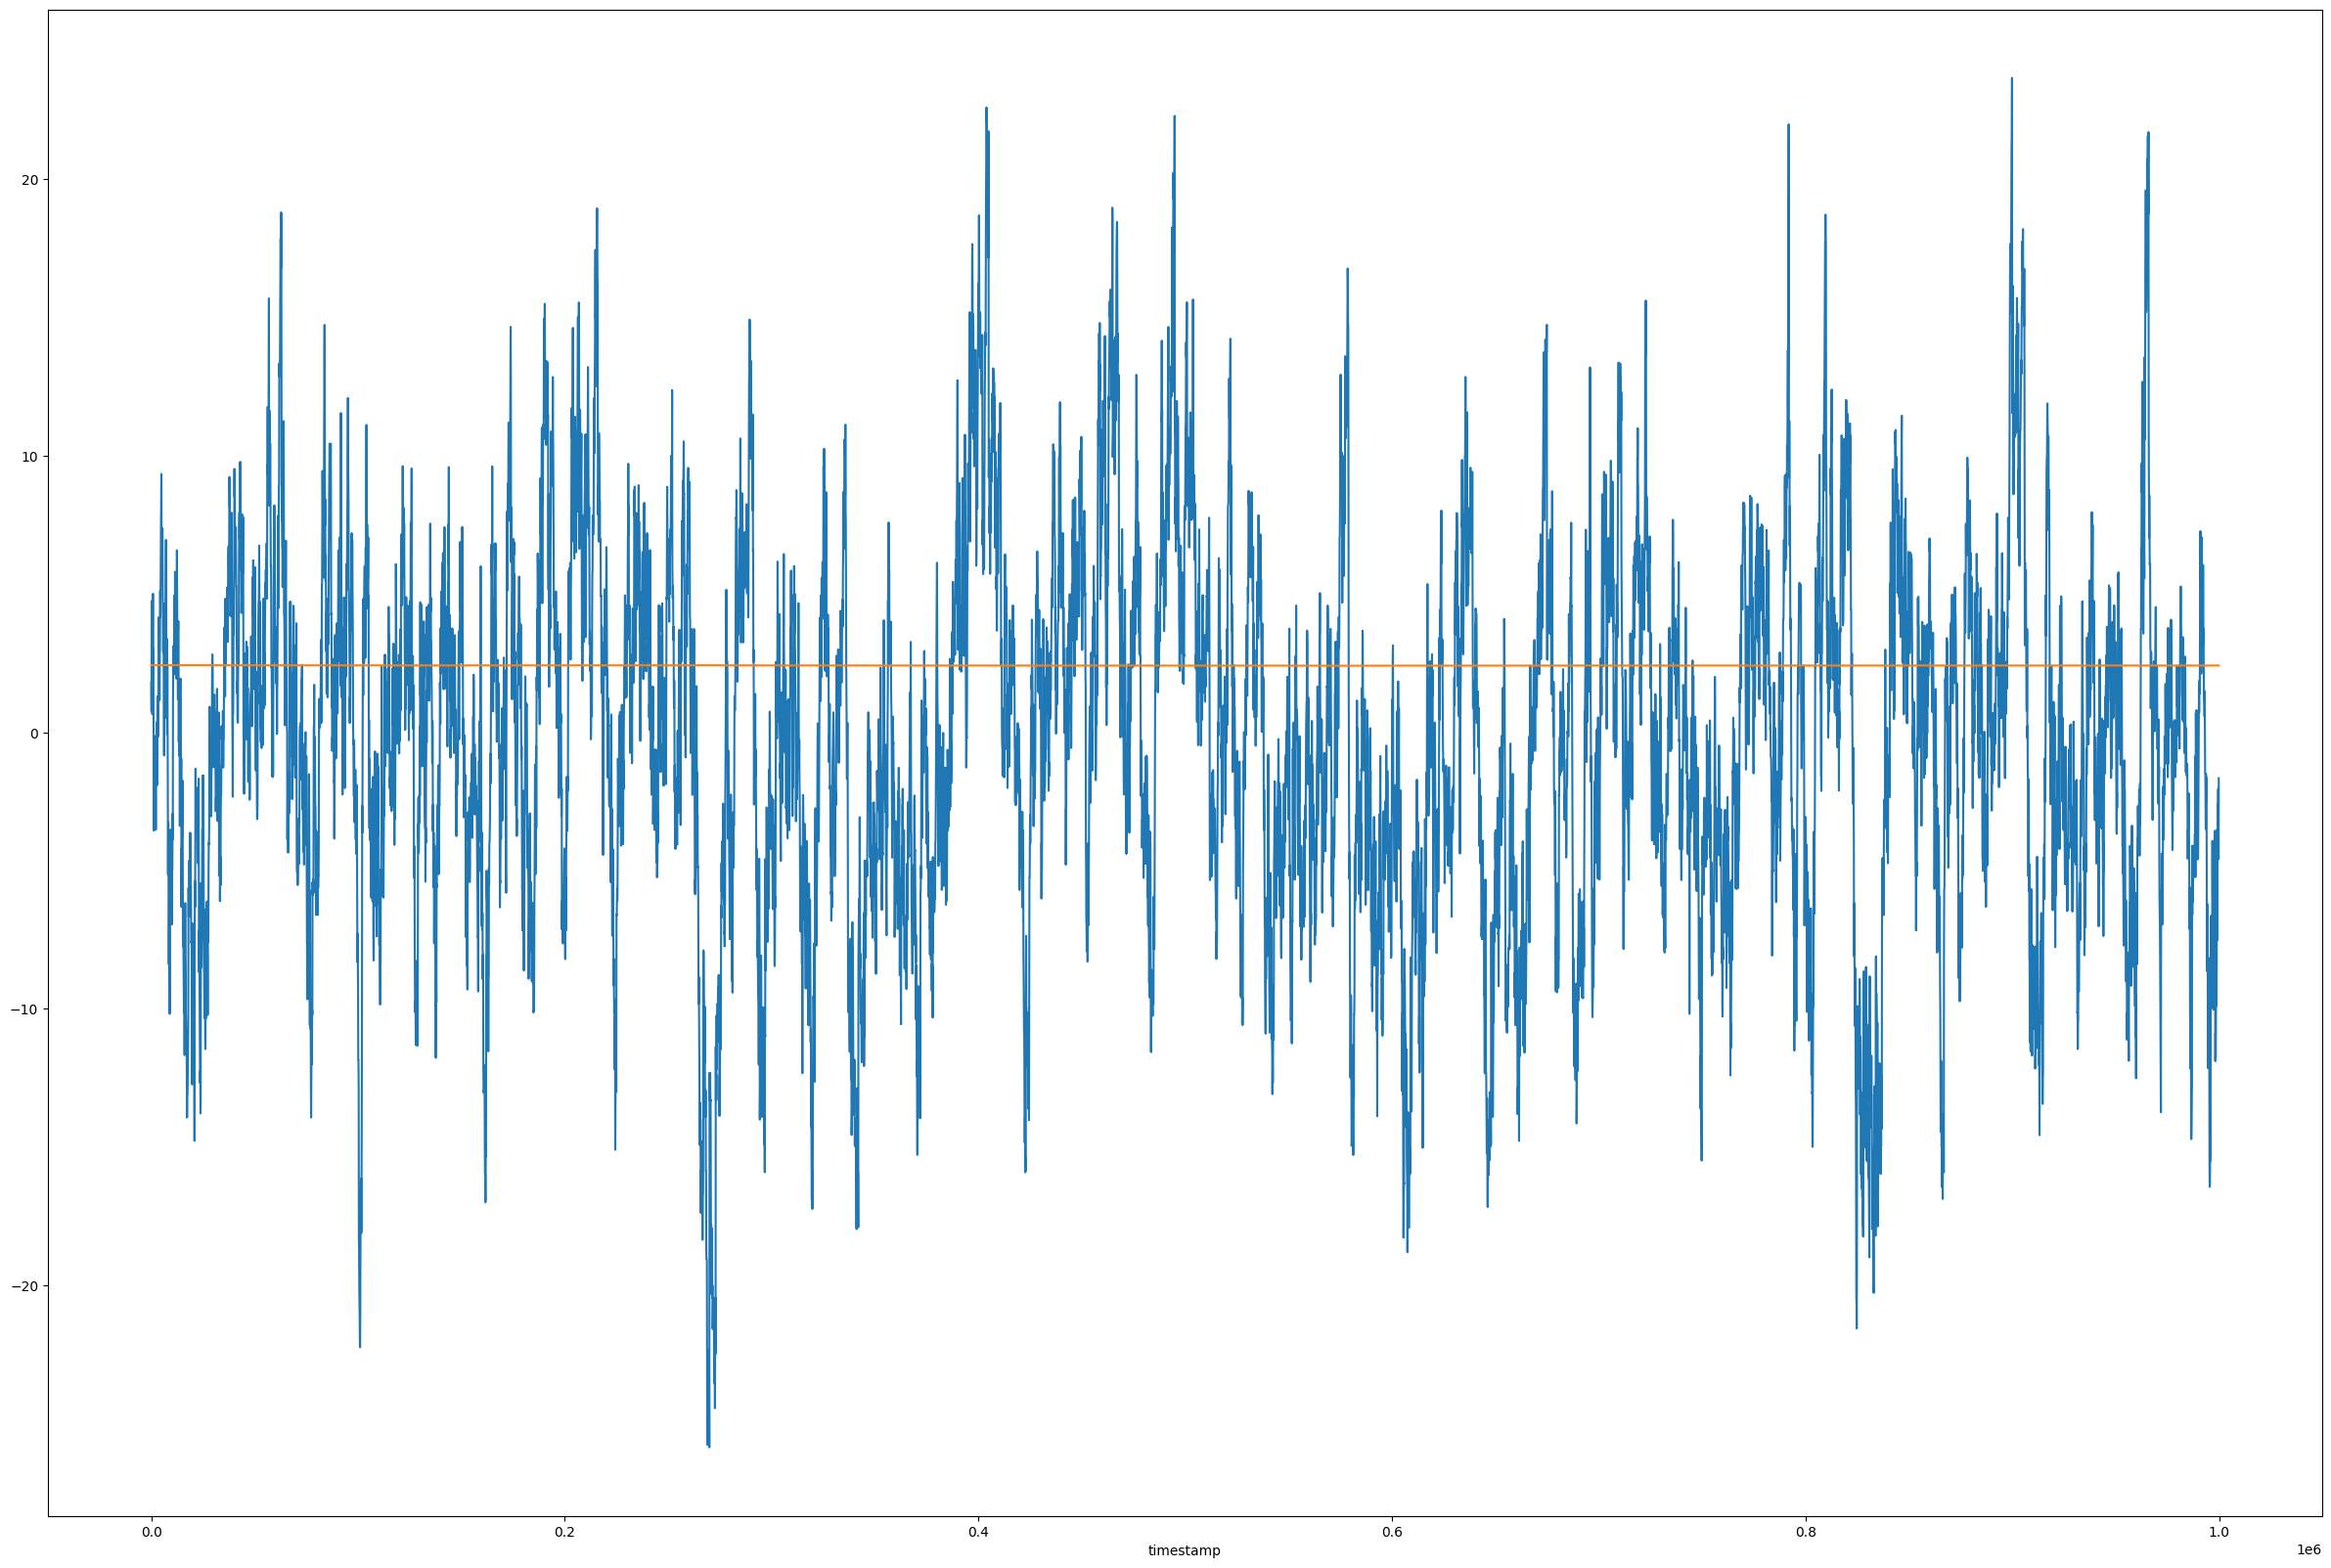

In [20]:
val['spread'].plot(figsize=(30, 20))
val['Q'].plot(figsize=(30, 20))